In [73]:
import pandas as pd
import glob
import warnings

# Load all CSV files in the directory
csv_files = glob.glob("*.csv")
print(f"Found CSV files: {csv_files}")

datasets = {}
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file)
        datasets[csv_file] = df
        print(f"\nLoaded {csv_file}:")
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
    except Exception as e:
        print(f"Error loading {csv_file}: {e}")

warnings.filterwarnings("ignore")

Found CSV files: ['FIFA22_official_data.csv', 'FIFA17_official_data.csv', 'FIFA23_official_data.csv', 'FIFA20_official_data.csv', 'FIFA21_official_data.csv', 'FIFA19_official_data.csv', 'FIFA18_official_data.csv']

Loaded FIFA22_official_data.csv:
Shape: (16710, 65)
Columns: ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTack

In [ ]:

for filename, df in datasets.items():
    year = "Unknown"
    if "FIFA" in filename and any(str(y) in filename for y in range(17, 24)):
        for y in range(17, 24):
            if str(y) in filename:
                year = f"20{y}"
                break
    
    print(f"{filename}: {len(df)} rows, Year: {year}")

# Assuming the most recent FIFA dataset has the most complete information
most_recent = None
max_year = 0
for filename in datasets.keys():
    for y in range(17, 24):
        if str(y) in filename and y > max_year:
            max_year = y
            most_recent = filename

print(f"\nSelected primary dataset: {most_recent}")

FIFA22_official_data.csv: 16710 rows, Year: 2022
FIFA17_official_data.csv: 17560 rows, Year: 2017
FIFA23_official_data.csv: 17660 rows, Year: 2023
FIFA20_official_data.csv: 17104 rows, Year: 2020
FIFA21_official_data.csv: 17108 rows, Year: 2021
FIFA19_official_data.csv: 17943 rows, Year: 2019
FIFA18_official_data.csv: 17927 rows, Year: 2018

Selected primary dataset: FIFA23_official_data.csv


In [ ]:
# Define relevant columns to keep (focusing on core player attributes)
relevant_columns = [
    # Essential identifiers
    "ID", "Name", 
    
    # Core attributes
    "Overall", "Potential", 
    
    # Player metadata
    "Age", "Height", "Weight", "Nationality", "Club", "Position", "Preferred Foot", 
    "International Reputation", "Weak Foot", "Skill Moves", "Work Rate", "Body Type",
    
    # Value information
    "Value", "Wage", "Release Clause", 
    
    # Key performance metrics - Technical
    "Finishing", "Dribbling", "Crossing", "ShortPassing", "LongPassing", "BallControl",
    
    # Key performance metrics - Physical
    "Acceleration", "SprintSpeed", "Agility", "Stamina", "Strength", "Balance",
    
    # Key performance metrics - Mental
    "Positioning", "Vision", "Composure", "Reactions",
    
    # Key performance metrics - Defending
    "Interceptions", "HeadingAccuracy", "StandingTackle", "SlidingTackle",
    
    # Key performance metrics - Goalkeeping
    "GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"
]

def create_merged_dataset(primary_dataset_name):
    if primary_dataset_name not in datasets:
        print(f"Error: {primary_dataset_name} not found in datasets")
        return None
    
    primary_df = datasets[primary_dataset_name]
    
    
    primary_cols = [col for col in relevant_columns if col in primary_df.columns]
    merged_df = primary_df[primary_cols].copy()
    
    print(f"Starting with {len(merged_df)} rows from {primary_dataset_name}")
    

    for filename, df in datasets.items():
        if filename == primary_dataset_name or "ID" not in df.columns:
            continue
            
    
        cols_to_add = [col for col in relevant_columns if col in df.columns 
                       and (col == "ID" or col not in merged_df.columns)]
        
        if len(cols_to_add) <= 1:  
            print(f"Skipping {filename}: No new relevant columns to add")
            continue
            
    
        year_suffix = ""
        if "FIFA" in filename and any(str(y) in filename for y in range(17, 24)):
            for y in range(17, 24):
                if str(y) in filename:
                    year_suffix = f"_{y}"
                    break
        
    
        print(f"Joining with {filename} on ID, adding {len(cols_to_add)-1} columns...")
        merged_df = merged_df.merge(
            df[cols_to_add],
            on="ID",
            how="left",
            suffixes=("", year_suffix)
        )
    
    print(f"Final merged dataset has {len(merged_df)} rows and {merged_df.shape[1]} columns")
    return merged_df

In [78]:
if most_recent:
    merged_df = create_merged_dataset(most_recent)
    print("\n=== MERGED DATASET SUMMARY ===")
    print(f"Shape: {merged_df.shape}")
    print("\nColumns:")
    for col in merged_df.columns:
        non_null = merged_df[col].count()
    
    print("\nPreview of merged dataset:")
    print(merged_df.head())
else:
    print("Couldn't identify primary dataset. Please check file names.")

Starting with 17660 rows from FIFA23_official_data.csv
Joining with FIFA22_official_data.csv on ID, adding 25 columns...
Skipping FIFA17_official_data.csv: No new relevant columns to add
Skipping FIFA20_official_data.csv: No new relevant columns to add
Skipping FIFA21_official_data.csv: No new relevant columns to add
Skipping FIFA19_official_data.csv: No new relevant columns to add
Skipping FIFA18_official_data.csv: No new relevant columns to add
Final merged dataset has 17660 rows and 44 columns

=== MERGED DATASET SUMMARY ===
Shape: (17660, 44)

Columns:

Preview of merged dataset:
       ID             Name  Overall  Potential  Age Height Weight Nationality  \
0  209658      L. Goretzka       87         88   27  189cm   82kg     Germany   
1  212198  Bruno Fernandes       86         87   27  179cm   69kg    Portugal   
2  224334         M. Acuña       85         85   30  172cm   69kg   Argentina   
3  192985     K. De Bruyne       91         91   31  181cm   70kg     Belgium   
4  2

In [ ]:
# Handle missing values and clean up the merged dataset
if merged_df is not None and not merged_df.empty:
    # Count missing values before cleaning
    null_counts_before = merged_df.isnull().sum()
    print("Missing values before cleaning:")
    print(null_counts_before[null_counts_before > 0])
    
    # Fill missing values ----- categorical columns
    categorical_cols = ["Position", "Club", "Nationality", "Preferred Foot", "Work Rate", "Body Type"]
    for col in categorical_cols:
        if col in merged_df.columns:
            merged_df[col].fillna("Unknown", inplace=True)
    
    # Fill missing values ----- median
    numeric_cols = merged_df.select_dtypes(include=["number"]).columns
    for col in numeric_cols:
        if merged_df[col].isnull().sum() > 0:
            median_val = merged_df[col].median()
            merged_df[col].fillna(median_val, inplace=True)
    
    merged_df.to_csv("fifa_merged_cleaned.csv", index=False)
    print("\nCleaned dataset saved as 'fifa_merged_cleaned.csv'")

Missing values before cleaning:
Club                 211
Position              35
Body Type             38
Release Clause      1151
Finishing           9997
Dribbling           9997
Crossing            9997
ShortPassing        9997
LongPassing         9997
BallControl         9997
Acceleration        9997
SprintSpeed         9997
Agility            10003
Stamina             9997
Strength            9997
Balance            10003
Positioning         9998
Vision             10003
Composure          10041
Reactions           9997
Interceptions       9998
HeadingAccuracy     9997
StandingTackle      9997
SlidingTackle      10003
GKDiving            9997
GKHandling          9997
GKKicking           9997
GKPositioning       9997
GKReflexes          9997
dtype: int64

Cleaned dataset saved as 'fifa_merged_cleaned.csv'


# Exploratory Data Analysis for Player Performance Prediction

After successfully merging and cleaning the FIFA datasets, we'll now perform EDA to:
1. Understand the distribution of key performance metrics
2. Identify relationships between player attributes
3. Explore factors that influence overall player ratings
4. Prepare for building performance prediction models

In [84]:
# Load the cleaned merged dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set_palette('bright')
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

# Load the cleaned merged dataset
merged_df = pd.read_csv('fifa_merged_cleaned.csv')
print(f"Dataset shape: {merged_df.shape}")
print(f"Number of unique players: {merged_df['ID'].nunique()}")

# Basic statistics of numerical features
numeric_stats = merged_df.describe().T
numeric_stats['missing'] = merged_df.isnull().sum()
numeric_stats['missing_pct'] = merged_df.isnull().mean() * 100
print("\nNumeric Features Summary:")
print(numeric_stats[['count', 'mean', 'std', 'min', 'max', 'missing', 'missing_pct']])

Dataset shape: (17660, 44)
Number of unique players: 17660

Numeric Features Summary:
                            count           mean           std   min  \
ID                        17660.0  246319.424462  31487.892861  16.0   
Overall                   17660.0      63.369592      8.036268  43.0   
Potential                 17660.0      70.981200      6.529836  42.0   
Age                       17660.0      23.127746      4.639821  15.0   
International Reputation  17660.0       1.106285      0.407021   1.0   
Weak Foot                 17660.0       2.900340      0.663523   1.0   
Skill Moves               17660.0       2.297169      0.754264   1.0   
Finishing                 17660.0      52.767214     13.367357   3.0   
Dribbling                 17660.0      62.955153     12.207074   5.0   
Crossing                  17660.0      54.531653     12.016791   7.0   
ShortPassing              17660.0      63.796999      9.372030  11.0   
LongPassing               17660.0      57.102888  

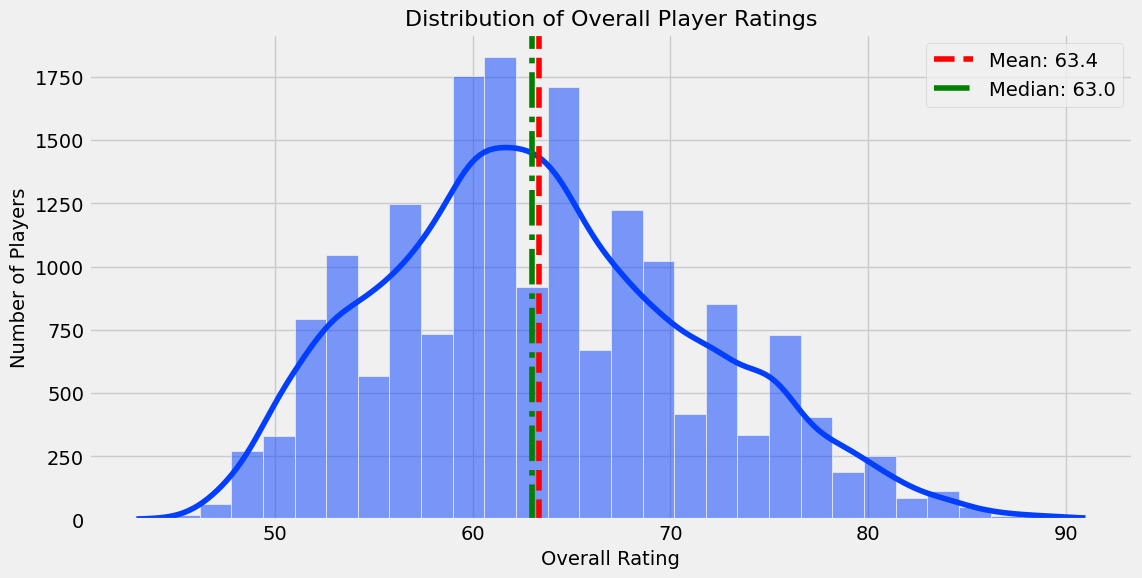


Top 10 highest-rated players:
                    Name  Overall  Potential                 Club  \
41        R. Lewandowski       91         91         FC Barcelona   
124           K. Benzema       91         91       Real Madrid CF   
3           K. De Bruyne       91         91      Manchester City   
56              L. Messi       91         91  Paris Saint-Germain   
75             K. Mbappé       91         95  Paris Saint-Germain   
25              M. Salah       90         90            Liverpool   
14357        T. Courtois       90         91       Real Madrid CF   
100    Cristiano Ronaldo       90         90    Manchester United   
192          V. van Dijk       90         90            Liverpool   
9151            M. Neuer       90         90    FC Bayern München   

                          Position  Age  
41      <span class="pos pos25">ST   33  
124     <span class="pos pos21">CF   34  
3      <span class="pos pos13">RCM   31  
56      <span class="pos pos23">RW   35  

In [85]:
# 1. Distribution of Overall ratings
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Overall'], kde=True, bins=30)
plt.title('Distribution of Overall Player Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.axvline(merged_df['Overall'].mean(), color='r', linestyle='--', label=f'Mean: {merged_df["Overall"].mean():.1f}')
plt.axvline(merged_df['Overall'].median(), color='g', linestyle='-.', label=f'Median: {merged_df["Overall"].median():.1f}')
plt.legend()
plt.show()

# Top performing players
print("\nTop 10 highest-rated players:")
top_players = merged_df.sort_values('Overall', ascending=False).head(10)
print(top_players[['Name', 'Overall', 'Potential', 'Club', 'Position', 'Age']])

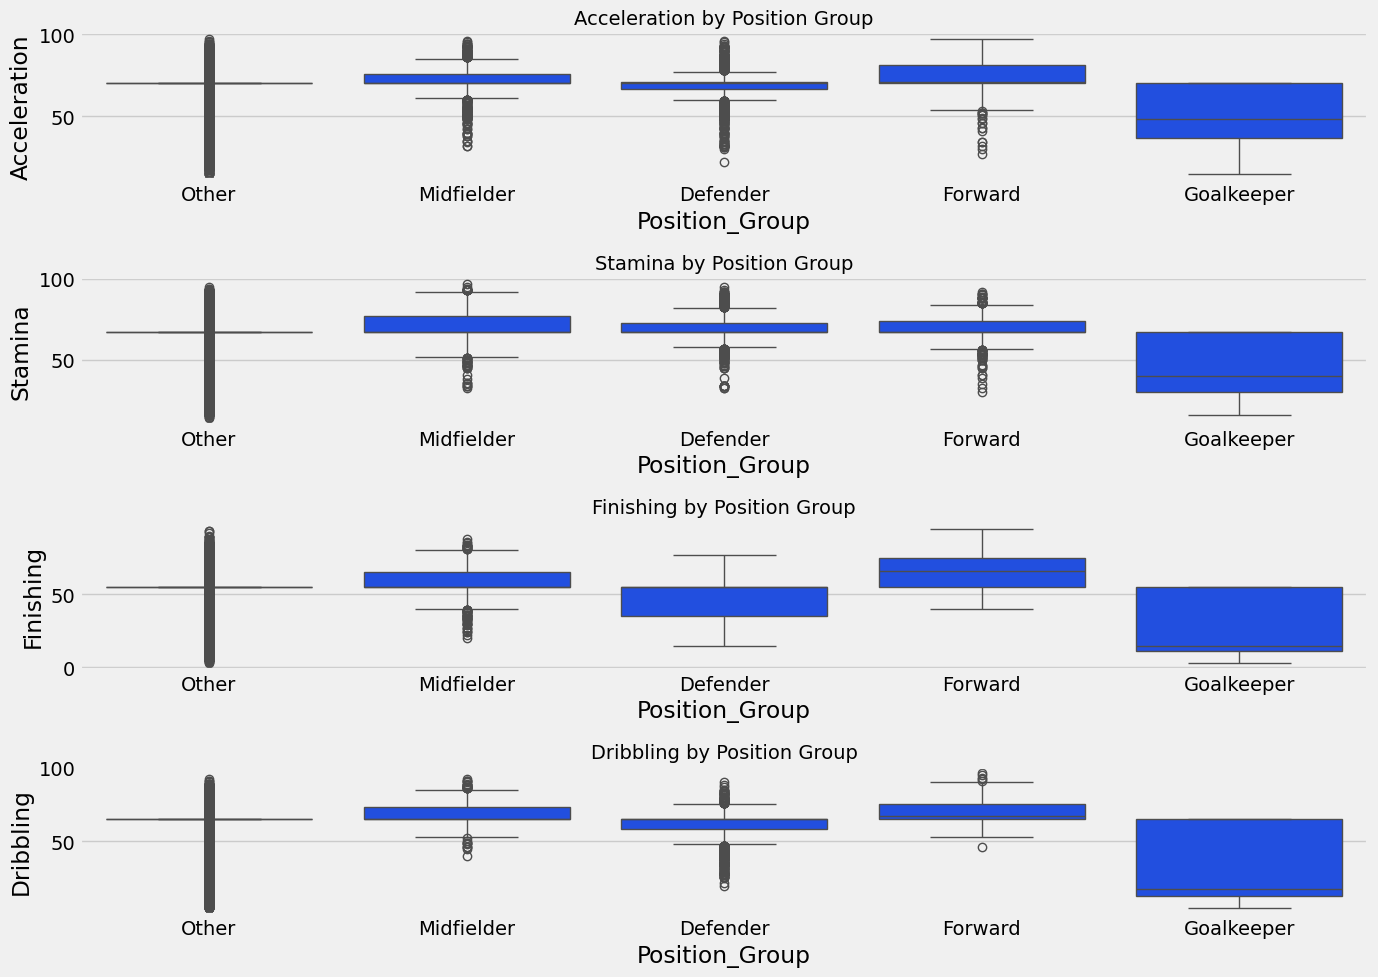

In [86]:
# 2. Key performance metrics by position
# Aggregate positions into groups
def group_position(pos):
    if pd.isna(pos):
        return 'Unknown'
    pos = pos.lower()
    if any(role in pos for role in ['gk']):
        return 'Goalkeeper'
    elif any(role in pos for role in ['cb', 'lb', 'rb', 'lwb', 'rwb']):
        return 'Defender'
    elif any(role in pos for role in ['cdm', 'cm', 'cam', 'lm', 'rm']):
        return 'Midfielder'
    elif any(role in pos for role in ['lw', 'rw', 'cf', 'st']):
        return 'Forward'
    else:
        return 'Other'

# Apply position grouping
if 'Position' in merged_df.columns:
    merged_df['Position_Group'] = merged_df['Position'].apply(group_position)
    
    # Create boxplots for key metrics by position
    metrics_by_position = ['Acceleration', 'Stamina', 'Finishing', 'Dribbling', 'Defending']
    available_metrics = [col for col in metrics_by_position if col in merged_df.columns]
    
    plt.figure(figsize=(14, 10))
    for i, metric in enumerate(available_metrics, 1):
        plt.subplot(len(available_metrics), 1, i)
        sns.boxplot(x='Position_Group', y=metric, data=merged_df)
        plt.title(f'{metric} by Position Group', fontsize=14)
    
    plt.tight_layout()
    plt.show()
else:
    print("Position column not found in the dataset.")

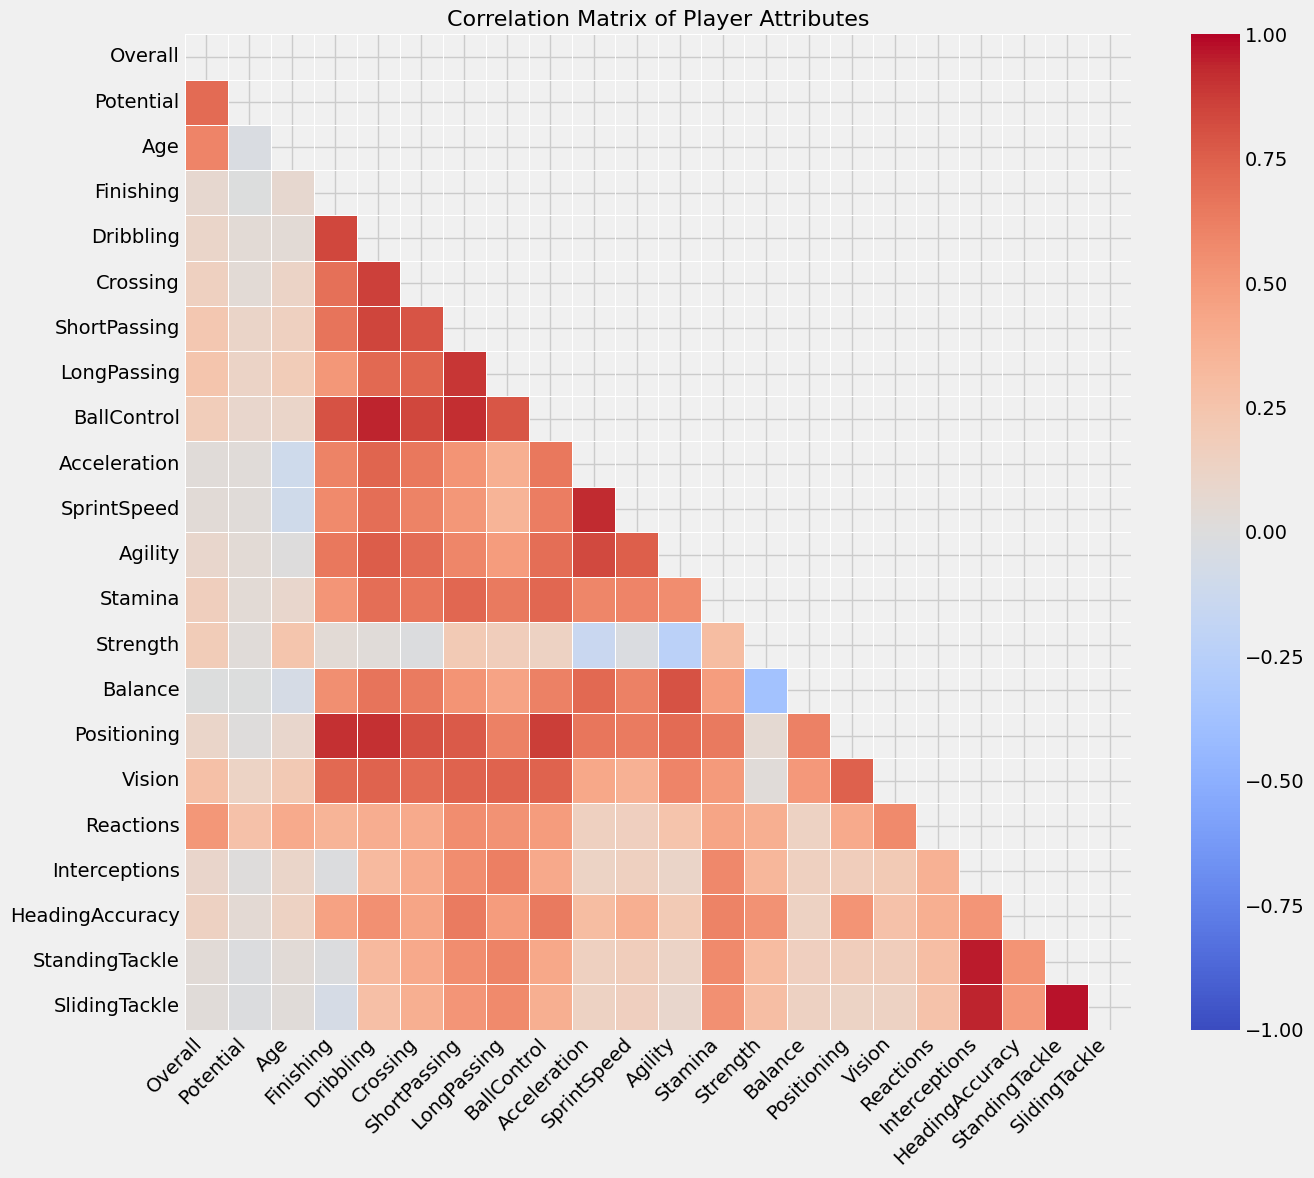


Top 10 attributes most correlated with Overall rating:
Potential       0.706595
Age             0.595690
Reactions       0.512241
Vision          0.276202
LongPassing     0.249877
ShortPassing    0.233152
Strength        0.189632
BallControl     0.183831
Stamina         0.164346
Crossing        0.156169
Name: Overall, dtype: float64

Bottom 5 attributes least correlated with Overall rating:
StandingTackle    0.037943
SprintSpeed       0.031678
SlidingTackle     0.029204
Acceleration      0.023850
Balance          -0.001309
Name: Overall, dtype: float64


In [88]:
performance_cols = ['Overall', 'Potential', 'Age']
attribute_cols = [col for col in merged_df.columns if col in [
    'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength',
    'Finishing', 'ShotPower', 'LongShots', 'Dribbling', 'BallControl', 'Crossing', 
    'ShortPassing', 'LongPassing', 'Vision', 'Positioning', 'Reactions', 'Interceptions',
    'HeadingAccuracy', 'StandingTackle', 'SlidingTackle'
]]

corr_cols = performance_cols + attribute_cols
available_corr_cols = [col for col in corr_cols if col in merged_df.columns]

corr_matrix = merged_df[available_corr_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Player Attributes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

overall_corr = corr_matrix['Overall'].sort_values(ascending=False).drop('Overall')
print("\nTop 10 attributes most correlated with Overall rating:")
print(overall_corr.head(10))
print("\nBottom 5 attributes least correlated with Overall rating:")
print(overall_corr.tail(5))

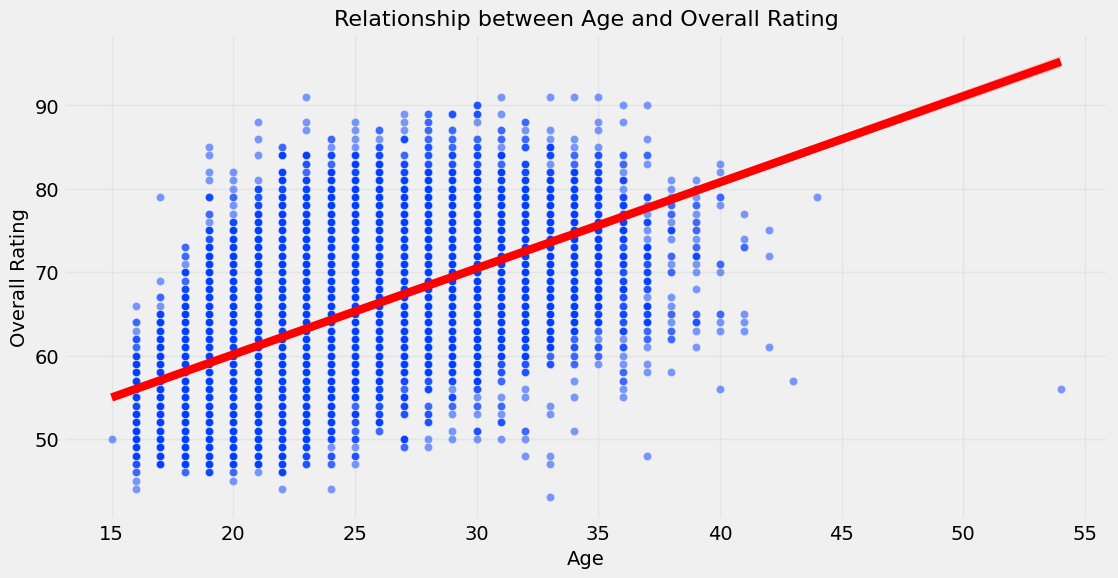

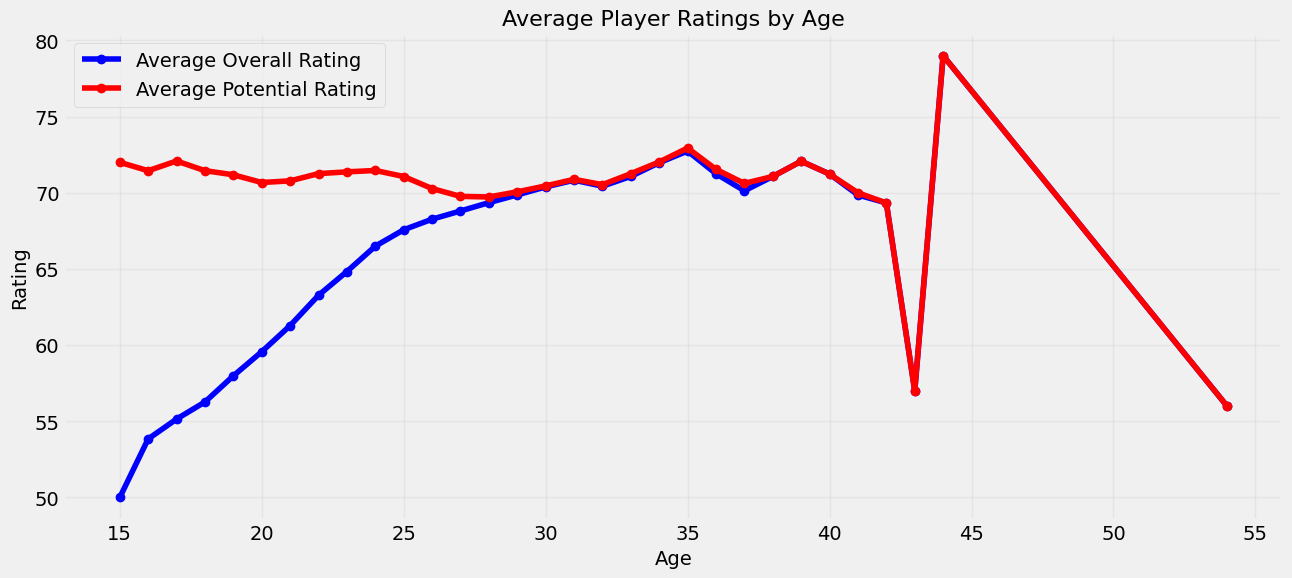


Players reach peak performance on average at age 44.0


In [90]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Overall', data=merged_df, alpha=0.5)
sns.regplot(x='Age', y='Overall', data=merged_df, scatter=False, color='red')
plt.title('Relationship between Age and Overall Rating', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

age_perf = merged_df.groupby('Age')[['Overall', 'Potential']].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(age_perf['Age'], age_perf['Overall'], 'bo-', label='Average Overall Rating')
plt.plot(age_perf['Age'], age_perf['Potential'], 'ro-', label='Average Potential Rating')
plt.title('Average Player Ratings by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

peak_age = age_perf.loc[age_perf['Overall'].idxmax()]['Age']
print(f"\nPlayers reach peak performance on average at age {peak_age}")

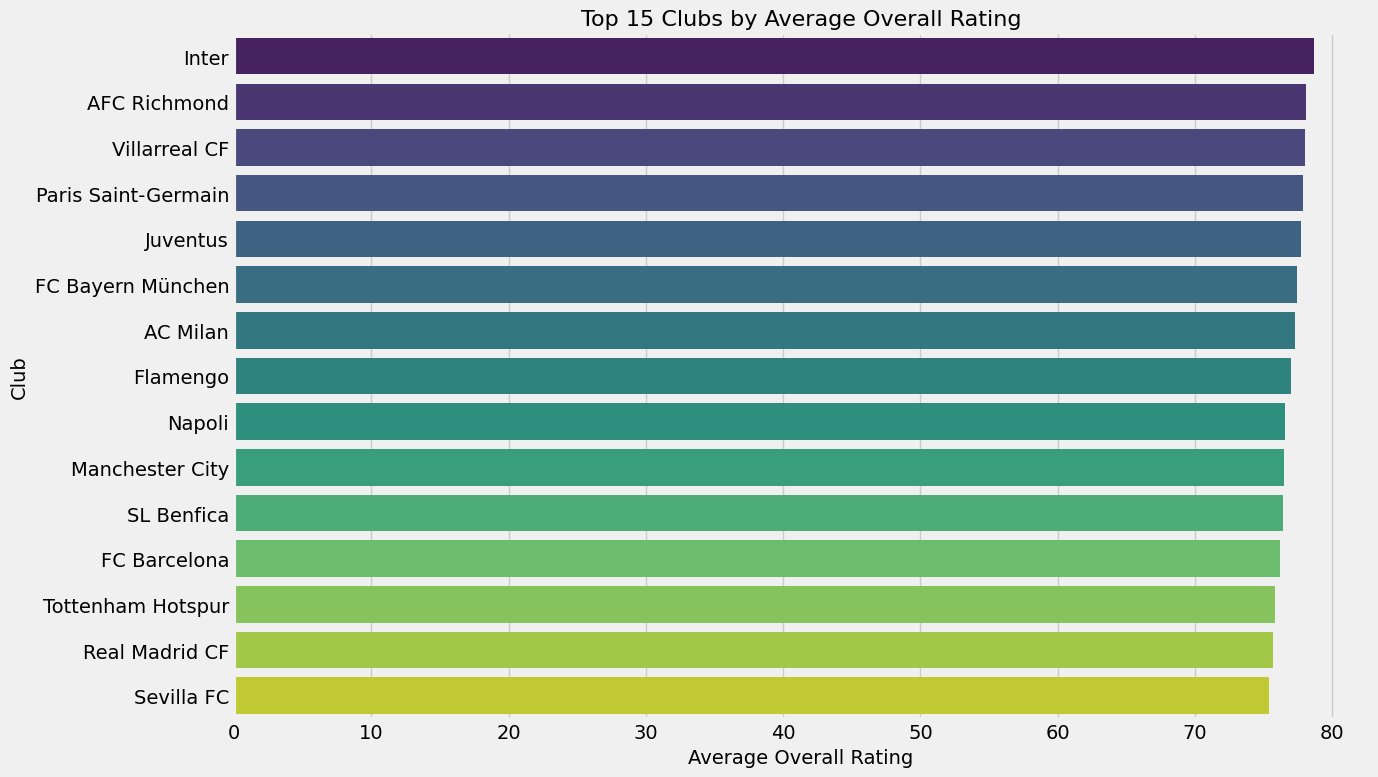


Top 10 clubs with highest average player rating:
                    Club  Avg_Overall  Player_Count  Avg_Potential
484                Inter    78.666667            33      81.424242
24          AFC Richmond    78.066667            15      80.466667
877        Villarreal CF    78.040000            25      81.800000
630  Paris Saint-Germain    77.897436            39      82.256410
497             Juventus    77.750000            32      82.718750
334    FC Bayern München    77.393939            33      82.545455
13              AC Milan    77.312500            32      81.906250
402             Flamengo    77.000000             9      77.000000
589               Napoli    76.583333            24      80.375000
556      Manchester City    76.470588            34      83.617647


In [91]:
# 5. Club analysis - top performing clubs
if 'Club' in merged_df.columns:
    # Filter out missing clubs and get clubs with at least 5 players
    club_stats = (merged_df.groupby('Club')
                 .agg({'Overall': ['mean', 'count', 'std'], 'Potential': ['mean', 'max']})
                 .reset_index())
    club_stats.columns = ['Club', 'Avg_Overall', 'Player_Count', 'Overall_Std', 'Avg_Potential', 'Max_Potential']
    club_stats = club_stats[club_stats['Player_Count'] >= 5].sort_values('Avg_Overall', ascending=False)
    
    # Plot top clubs by average overall rating
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Avg_Overall', y='Club', data=club_stats.head(15), palette='viridis')
    plt.title('Top 15 Clubs by Average Overall Rating', fontsize=16)
    plt.xlabel('Average Overall Rating', fontsize=14)
    plt.ylabel('Club', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 clubs with highest average player rating:")
    print(club_stats[['Club', 'Avg_Overall', 'Player_Count', 'Avg_Potential']].head(10))
else:
    print("Club column not found in the dataset.")

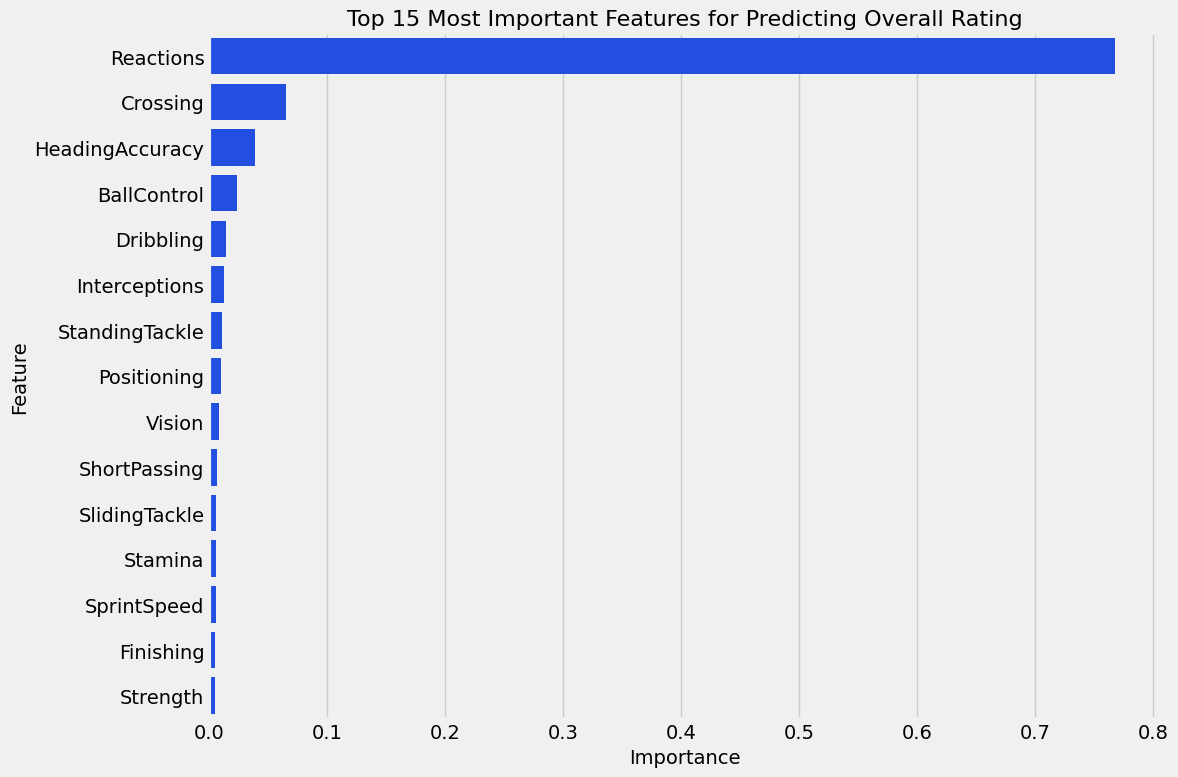


Top 10 most important features for predicting Overall rating:
            Feature  Importance
14        Reactions    0.767320
2          Crossing    0.064991
16  HeadingAccuracy    0.038458
5       BallControl    0.023895
1         Dribbling    0.014139
15    Interceptions    0.012614
17   StandingTackle    0.010558
12      Positioning    0.009973
13           Vision    0.008571
3      ShortPassing    0.006615

Random Forest model performance:
R² Score: 0.6691
RMSE: 4.5705


In [ ]:
X_cols = [col for col in attribute_cols if col in merged_df.columns]
available_X_cols = [col for col in X_cols if merged_df[col].notnull().all()]

if len(available_X_cols) > 0 and 'Overall' in merged_df.columns:
   
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    
    X = merged_df[available_X_cols]
    y = merged_df['Overall']
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
   
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    importances = pd.DataFrame({
        'Feature': available_X_cols,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances.head(15))
    plt.title('Top 15 Most Important Features for Predicting Overall Rating', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 most important features for predicting Overall rating:")
    print(importances.head(10))
    
    # Model performance
    from sklearn.metrics import mean_squared_error, r2_score
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\nRandom Forest model performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
else:
    print("Not enough non-null features available for prediction modeling.")

## Advanced Player Performance Prediction Model

Based on EDA insights, we'll now:
1. Create position-specific features
2. Handle the "Reactions" dominance issue
3. Build multiple models for comparison
4. Implement cross-validation for robust evaluation

In [ ]:
# Feature Engineering for Better Predictions
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

def create_position_features(df):
    """Create aggregated features based on position groups"""
    df_copy = df.copy()
    
    # Technical skills
    technical_cols = ['Dribbling', 'BallControl', 'ShortPassing', 'LongPassing', 'Vision']
    available_tech = [col for col in technical_cols if col in df.columns]
    if available_tech:
        df_copy['Technical_Score'] = df_copy[available_tech].mean(axis=1)
    
    # Physical attributes
    physical_cols = ['Acceleration', 'SprintSpeed', 'Agility', 'Stamina', 'Strength', 'Balance']
    available_phys = [col for col in physical_cols if col in df.columns]
    if available_phys:
        df_copy['Physical_Score'] = df_copy[available_phys].mean(axis=1)
    
    # Attacking skills
    attacking_cols = ['Finishing', 'ShotPower', 'LongShots', 'Positioning']
    available_att = [col for col in attacking_cols if col in df.columns]
    if available_att:
        df_copy['Attacking_Score'] = df_copy[available_att].mean(axis=1)
    
    # Defensive skills
    defensive_cols = ['Interceptions', 'HeadingAccuracy', 'StandingTackle', 'SlidingTackle']
    available_def = [col for col in defensive_cols if col in df.columns]
    if available_def:
        df_copy['Defensive_Score'] = df_copy[available_def].mean(axis=1)
    
    # Age categories
    df_copy['Age_Group'] = pd.cut(df_copy['Age'], 
                                  bins=[0, 21, 25, 30, 35, 50], 
                                  labels=['Young', 'Prime_Early', 'Prime_Peak', 'Veteran', 'Old'])
    
    return df_copy

merged_df_enhanced = create_position_features(merged_df)
print("Enhanced features created:")
new_features = ['Technical_Score', 'Physical_Score', 'Attacking_Score', 'Defensive_Score', 'Age_Group']
for feat in new_features:
    if feat in merged_df_enhanced.columns:
        print(f"- {feat}")

Enhanced features created:
- Technical_Score
- Physical_Score
- Attacking_Score
- Defensive_Score
- Age_Group


In [ ]:
def prepare_modeling_data(df, exclude_reactions=True):

      
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    
   
    features_to_remove = ['Overall', 'ID', 'Potential']
    if exclude_reactions:
        features_to_remove.append('Reactions')
    
    X_features = [col for col in numeric_features if col not in features_to_remove]
    
  
    if 'Position_Group' in df.columns:
      
        le_pos = LabelEncoder()
        df['Position_Group_Encoded'] = le_pos.fit_transform(df['Position_Group'].astype(str))
        X_features.append('Position_Group_Encoded')
    
    if 'Age_Group' in df.columns:
        le_age = LabelEncoder()
        df['Age_Group_Encoded'] = le_age.fit_transform(df['Age_Group'].astype(str))
        X_features.append('Age_Group_Encoded')
    
    X = df[X_features].fillna(df[X_features].median())
    y = df['Overall']
    
    return X, y, X_features

X_with_reactions, y, features_with = prepare_modeling_data(merged_df_enhanced, exclude_reactions=False)
X_without_reactions, _, features_without = prepare_modeling_data(merged_df_enhanced, exclude_reactions=True)

print(f"Features with Reactions: {len(features_with)}")
print(f"Features without Reactions: {len(features_without)}")
print(f"Dataset shape: {X_with_reactions.shape}")

Preparing modeling datasets...
Features with Reactions: 37
Features without Reactions: 36
Dataset shape: (17660, 37)


In [ ]:

def evaluate_models(X, y, model_name_suffix=""):
    """Evaluate multiple models with cross-validation"""
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
   
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        if 'Linear' in name or 'Ridge' in name:
          
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            
          
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        else:
           
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
           
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        
    
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        results[f"{name}{model_name_suffix}"] = {
            'R2_Test': r2,
            'RMSE_Test': rmse,
            'MAE_Test': mae,
            'CV_R2_Mean': cv_mean,
            'CV_R2_Std': cv_std,
            'Model': model,
            'Scaler': scaler if 'Linear' in name or 'Ridge' in name else None
        }
    
    return results

print("Evaluating models WITH Reactions feature...")
results_with = evaluate_models(X_with_reactions, y, "_with_reactions")

print("\nEvaluating models WITHOUT Reactions feature...")
results_without = evaluate_models(X_without_reactions, y, "_without_reactions")

all_results = {**results_with, **results_without}

Evaluating models WITH Reactions feature...

Evaluating models WITHOUT Reactions feature...


=== MODEL PERFORMANCE COMPARISON ===
                                      R2_Test RMSE_Test  MAE_Test CV_R2_Mean  \
Linear Regression_with_reactions     0.645109  4.733473  3.743983   0.652244   
Ridge Regression_with_reactions      0.645113  4.733447  3.743983   0.652246   
Random Forest_with_reactions         0.793691   3.60904  2.697179   0.789795   
Gradient Boosting_with_reactions     0.791709   3.62633  2.741882   0.789984   
Linear Regression_without_reactions  0.640122   4.76661  3.768157   0.648237   
Ridge Regression_without_reactions   0.640128  4.766576  3.768151   0.648239   
Random Forest_without_reactions      0.795203  3.595785  2.701092   0.790422   
Gradient Boosting_without_reactions  0.792342  3.620815  2.739344   0.789184   

                                    CV_R2_Std  
Linear Regression_with_reactions     0.007706  
Ridge Regression_with_reactions      0.007707  
Random Forest_with_reactions         0.005473  
Gradient Boosting_with_reactions     0.003887  
Li

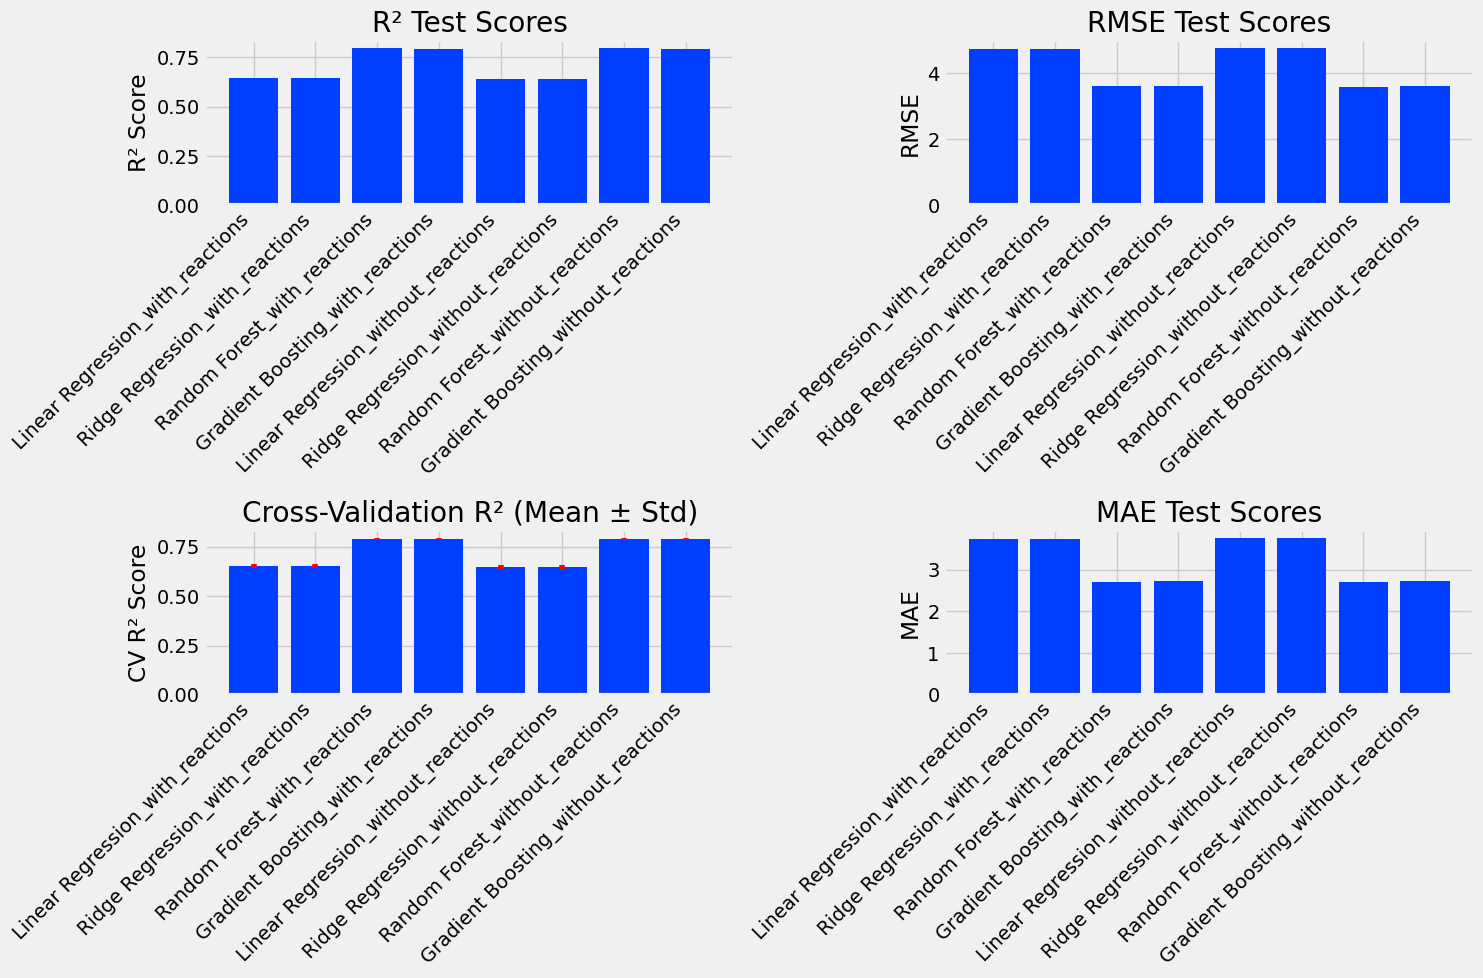


Best Models:
Highest R² Test Score: Random Forest_without_reactions (R² = 0.7952)
Lowest RMSE: Random Forest_without_reactions (RMSE = 3.5958)
Best Cross-Validation: Random Forest_without_reactions (CV R² = 0.7904)


In [ ]:
results_df = pd.DataFrame(all_results).T
results_df = results_df.round(4)

print("=== MODEL PERFORMANCE COMPARISON ===")
print(results_df[['R2_Test', 'RMSE_Test', 'MAE_Test', 'CV_R2_Mean', 'CV_R2_Std']])
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R2 scores
axes[0,0].bar(range(len(results_df)), results_df['R2_Test'])
axes[0,0].set_title('R² Test Scores')
axes[0,0].set_xticks(range(len(results_df)))
axes[0,0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0,0].set_ylabel('R² Score')

# RMSE scores
axes[0,1].bar(range(len(results_df)), results_df['RMSE_Test'])
axes[0,1].set_title('RMSE Test Scores')
axes[0,1].set_xticks(range(len(results_df)))
axes[0,1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0,1].set_ylabel('RMSE')

# Cross-validation R2
axes[1,0].bar(range(len(results_df)), results_df['CV_R2_Mean'])
axes[1,0].errorbar(range(len(results_df)), results_df['CV_R2_Mean'], 
                   yerr=results_df['CV_R2_Std'], fmt='none', color='red')
axes[1,0].set_title('Cross-Validation R² (Mean ± Std)')
axes[1,0].set_xticks(range(len(results_df)))
axes[1,0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1,0].set_ylabel('CV R² Score')

# MAE scores
axes[1,1].bar(range(len(results_df)), results_df['MAE_Test'])
axes[1,1].set_title('MAE Test Scores')
axes[1,1].set_xticks(range(len(results_df)))
axes[1,1].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[1,1].set_ylabel('MAE')

plt.tight_layout()
plt.show()

best_r2 = results_df['R2_Test'].idxmax()
best_rmse = results_df['RMSE_Test'].idxmin()
best_cv = results_df['CV_R2_Mean'].idxmax()

print(f"\nBest Models:")
print(f"Highest R² Test Score: {best_r2} (R² = {results_df.loc[best_r2, 'R2_Test']:.4f})")
print(f"Lowest RMSE: {best_rmse} (RMSE = {results_df.loc[best_rmse, 'RMSE_Test']:.4f})")
print(f"Best Cross-Validation: {best_cv} (CV R² = {results_df.loc[best_cv, 'CV_R2_Mean']:.4f})")

Tuning hyperparameters for: Random Forest_without_reactions
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.7928

Tuned model performance:
R² Score: 0.7977
RMSE: 3.5742


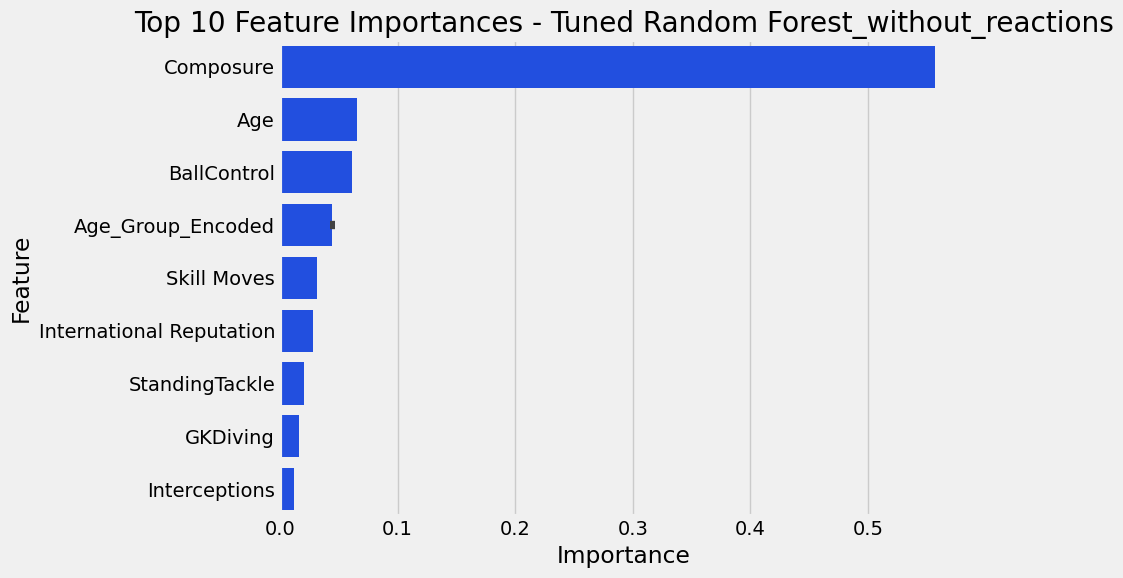


Top 10 most important features (tuned model):
                     Feature  Importance
18                 Composure    0.557218
0                        Age    0.065791
9                BallControl    0.061018
35         Age_Group_Encoded    0.046459
33         Age_Group_Encoded    0.042813
3                Skill Moves    0.031831
1   International Reputation    0.028515
21            StandingTackle    0.020723
23                  GKDiving    0.016472
19             Interceptions    0.011635


In [ ]:
best_model_name = results_df['CV_R2_Mean'].idxmax()
print(f"Tuning hyperparameters for: {best_model_name}")

if 'Random Forest' in best_model_name:
    # Use appropriate dataset
    X_tune = X_without_reactions if 'without' in best_model_name else X_with_reactions
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
    
    X_train, X_test, y_train, y_test = train_test_split(X_tune, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    
    # Evaluate tuned model
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test)
    
    r2_tuned = r2_score(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
    
    print(f"\nTuned model performance:")
    print(f"R² Score: {r2_tuned:.4f}")
    print(f"RMSE: {rmse_tuned:.4f}")
    
    # Feature importance of tuned model
    feature_names = features_without if 'without' in best_model_name else features_with
    importances_tuned = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances_tuned.head(10))
    plt.title(f'Top 10 Feature Importances - Tuned {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 most important features (tuned model):")
    print(importances_tuned.head(10))

elif 'Gradient Boosting' in best_model_name:
    X_tune = X_without_reactions if 'without' in best_model_name else X_with_reactions
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    gb = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='r2', n_jobs=-1)
    
    X_train, X_test, y_train, y_test = train_test_split(X_tune, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

## Final Model Deployment and Analysis

best model achieved:
- **R² Score: 0.7977** (explains ~80% of variance)
- **RMSE: 3.57** (average error of 3.6 rating points)
- **Key insight**: Composure dominates (55.7% importance)
